In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('Display.max_columns',None)

In [2]:
df=pd.read_csv('toyota.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


# Preprocessing Part 1

In [3]:
df.select_dtypes(include='object').nunique()

,0
model,18
transmission,4
fuelType,4


In [4]:
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [12]:
def segment_model(models):
  models=models.strip()
  segmented_models = {
    'Sedan': ['Corolla', 'Auris', 'Camry', 'Avensis', 'Verso-S'],
    'SUV': ['RAV4', 'C-HR', 'Land Cruiser', 'Urban Cruiser'],
    'Hatchback': ['Yaris', 'Aygo', 'IQ'],
    'Sports Car': ['GT86', 'Supra'],
    'MPV': ['Verso', 'PROACE VERSO'],
    'Pickup': ['Hilux'],
    'Hybrid': ['Prius']
}
  for key,value in segmented_models.items():
    if any(model in models for model in value):
      return key
  return 'Other'

In [13]:
df['segment_model']=df['model'].apply(segment_model)

In [14]:
df['segment_model'].value_counts()

,count
segment_model,
Hatchback,4091
Sedan,1108
SUV,1007
Hybrid,232
MPV,129
Pickup,86
Sports Car,85


# EDA

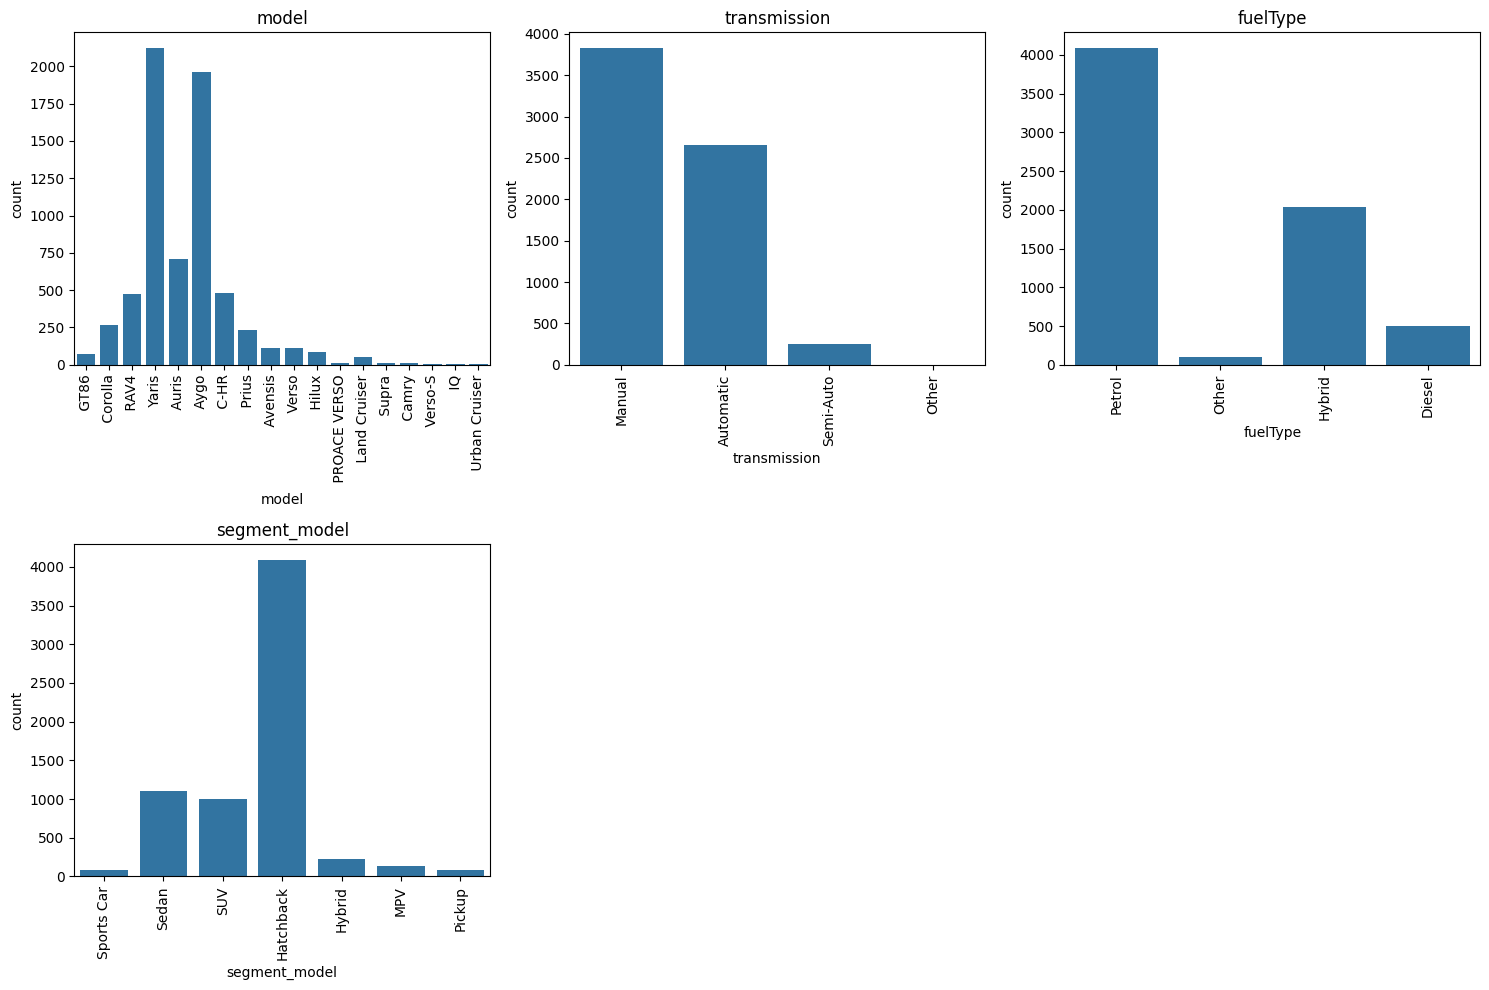

In [18]:
cat_vars=df.select_dtypes(include='object').columns.tolist()

num_cols=len(cat_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  top_values=df[var].value_counts().index
  filtered_df=df[df[var].isin(top_values)]
  sns.countplot(x=var,data=filtered_df,ax=axs[i])
  axs[i].tick_params(axis='x',rotation=90)
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

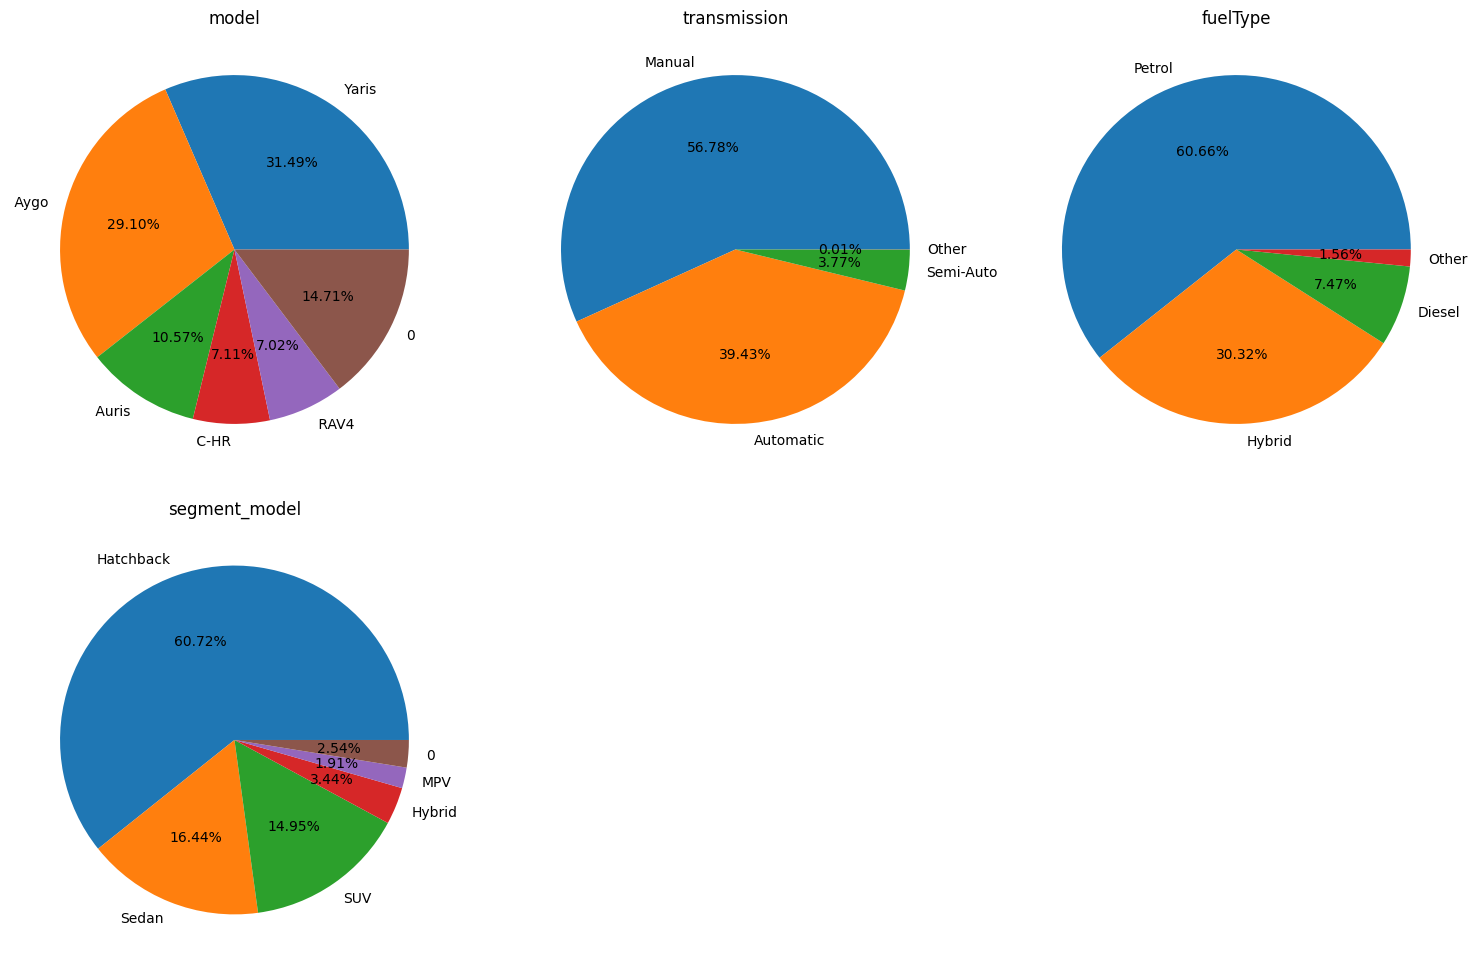

In [19]:
cat_vars=df.select_dtypes(include='object').columns.tolist()
max_categories=5

num_cols=len(cat_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  if i < len(axs):
    cat_counts=df[var].value_counts()

    if len(cat_counts) > max_categories:
      cat_tops=cat_counts[:max_categories]
      cat_others=pd.Series(cat_counts[max_categories:].sum())
      cat_counts=pd.concat([cat_tops,cat_others])
    axs[i].pie(x=cat_counts.values,labels=cat_counts.index,autopct="%1.2f%%")
    axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

<ipython-input-21-460844c6a2f3>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-21-460844c6a2f3>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-21-460844c6a2f3>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-21-460844c6a2f3>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-21-460844c6a2f3>:11: UserWarning: set_ticklabels() should only be used with a

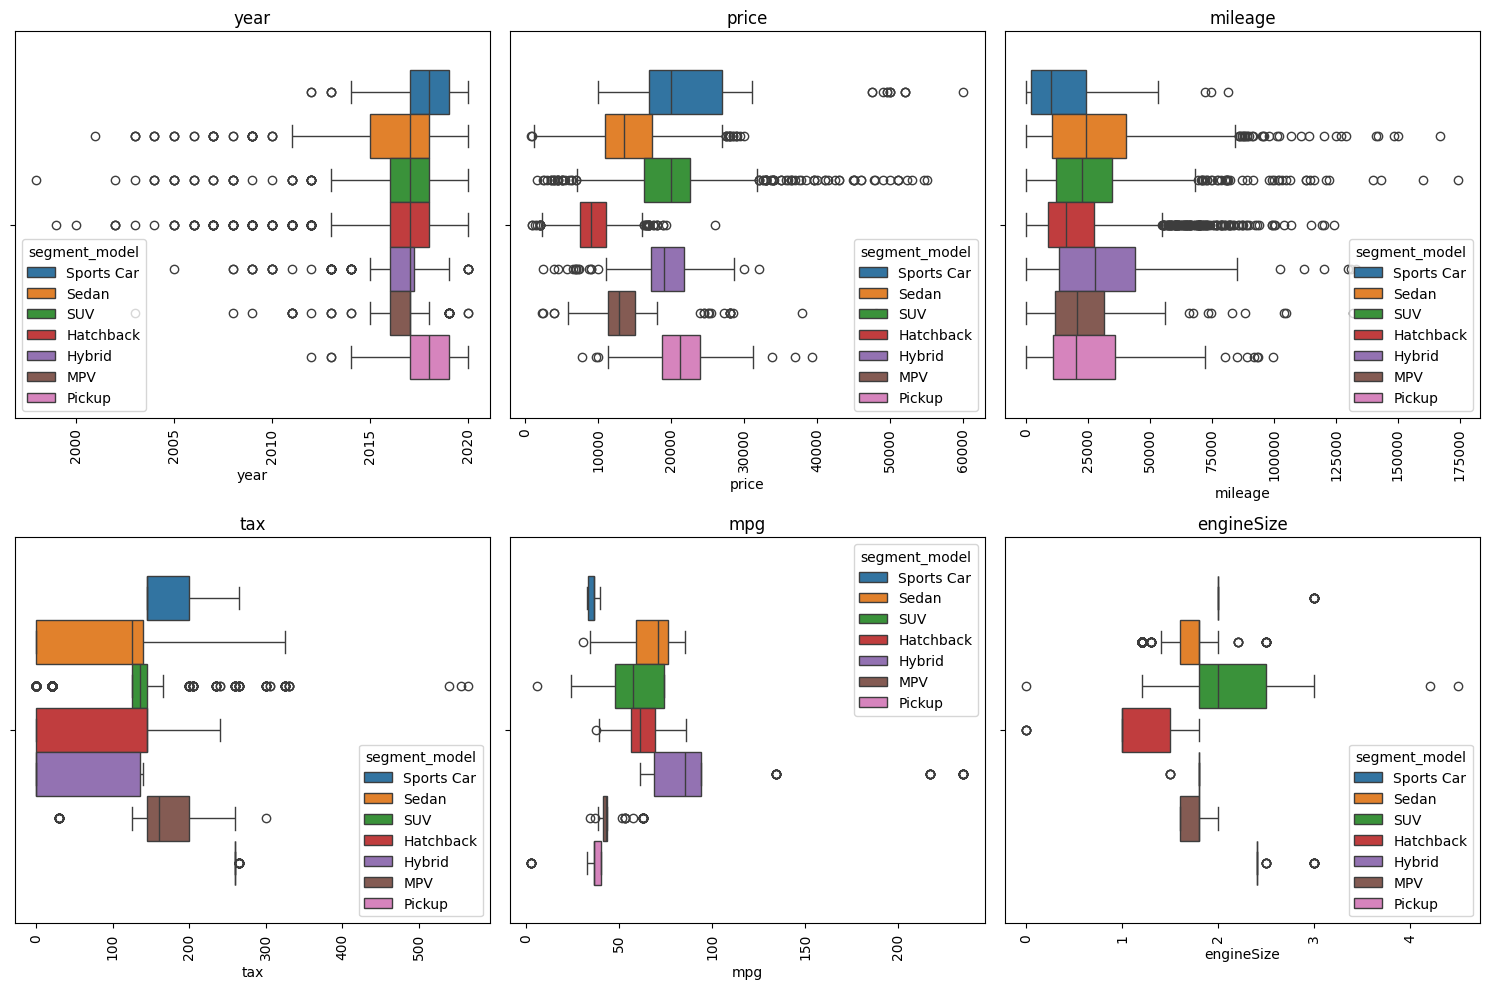

In [21]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()
max_categories=5

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.boxplot(x=var,hue='segment_model',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

<ipython-input-22-b2f71c2d268f>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-22-b2f71c2d268f>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-22-b2f71c2d268f>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-22-b2f71c2d268f>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-22-b2f71c2d268f>:11: UserWarning: set_ticklabels() should only be used with a

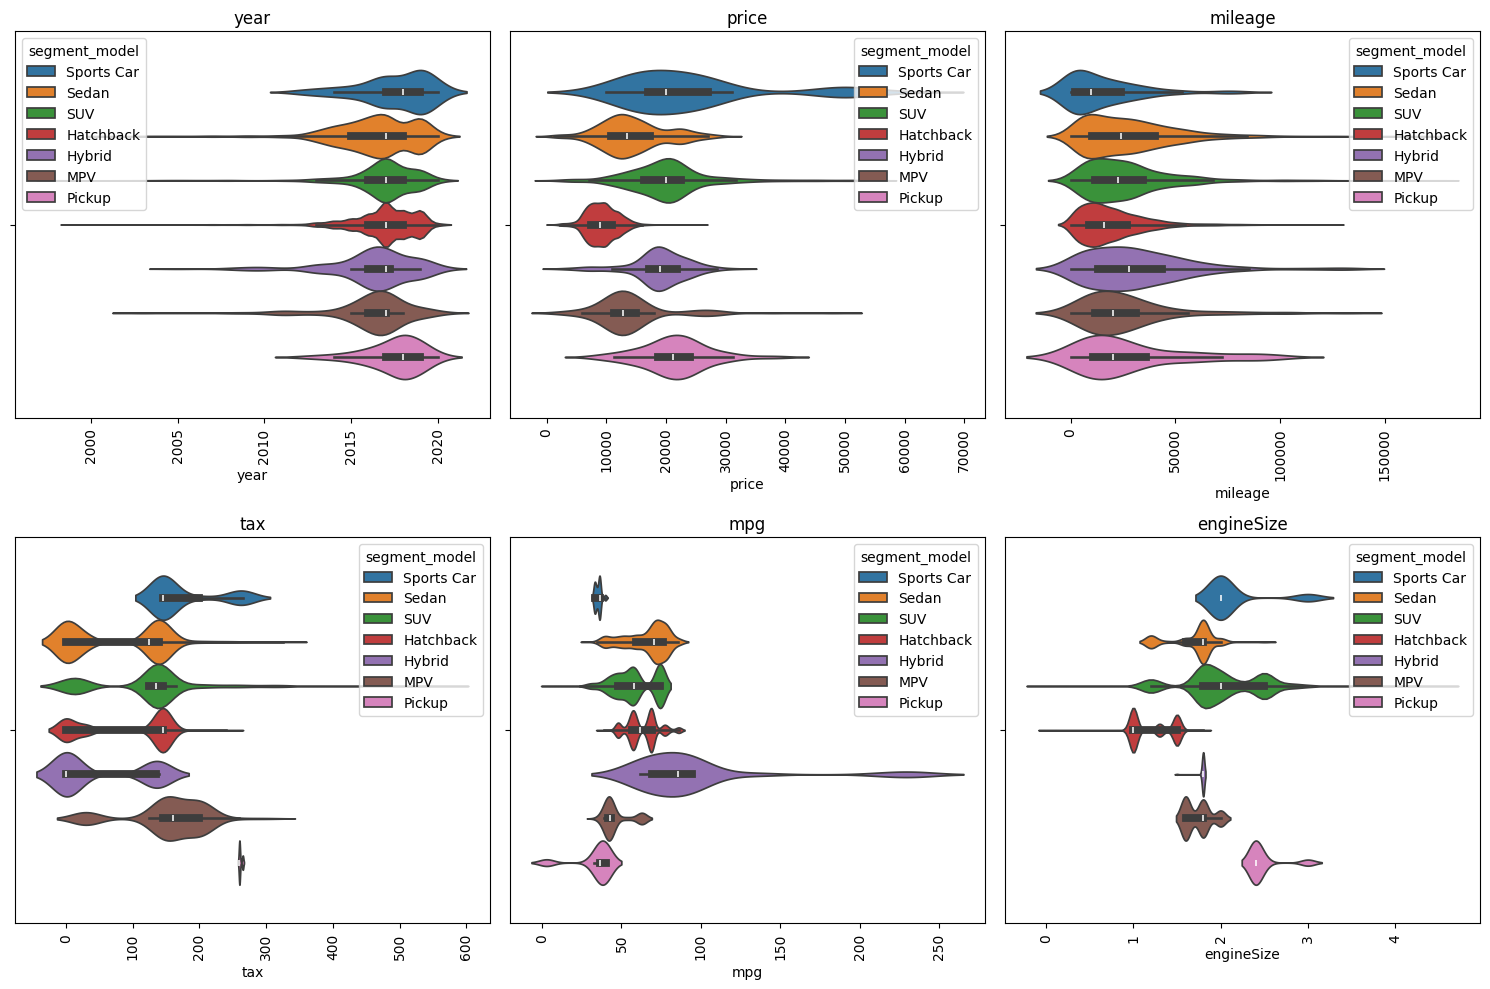

In [22]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()
max_categories=5

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.violinplot(x=var,hue='segment_model',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

<ipython-input-23-6445f1f141ba>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-23-6445f1f141ba>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-23-6445f1f141ba>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-23-6445f1f141ba>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-23-6445f1f141ba>:11: UserWarning: set_ticklabels() should only be used with a

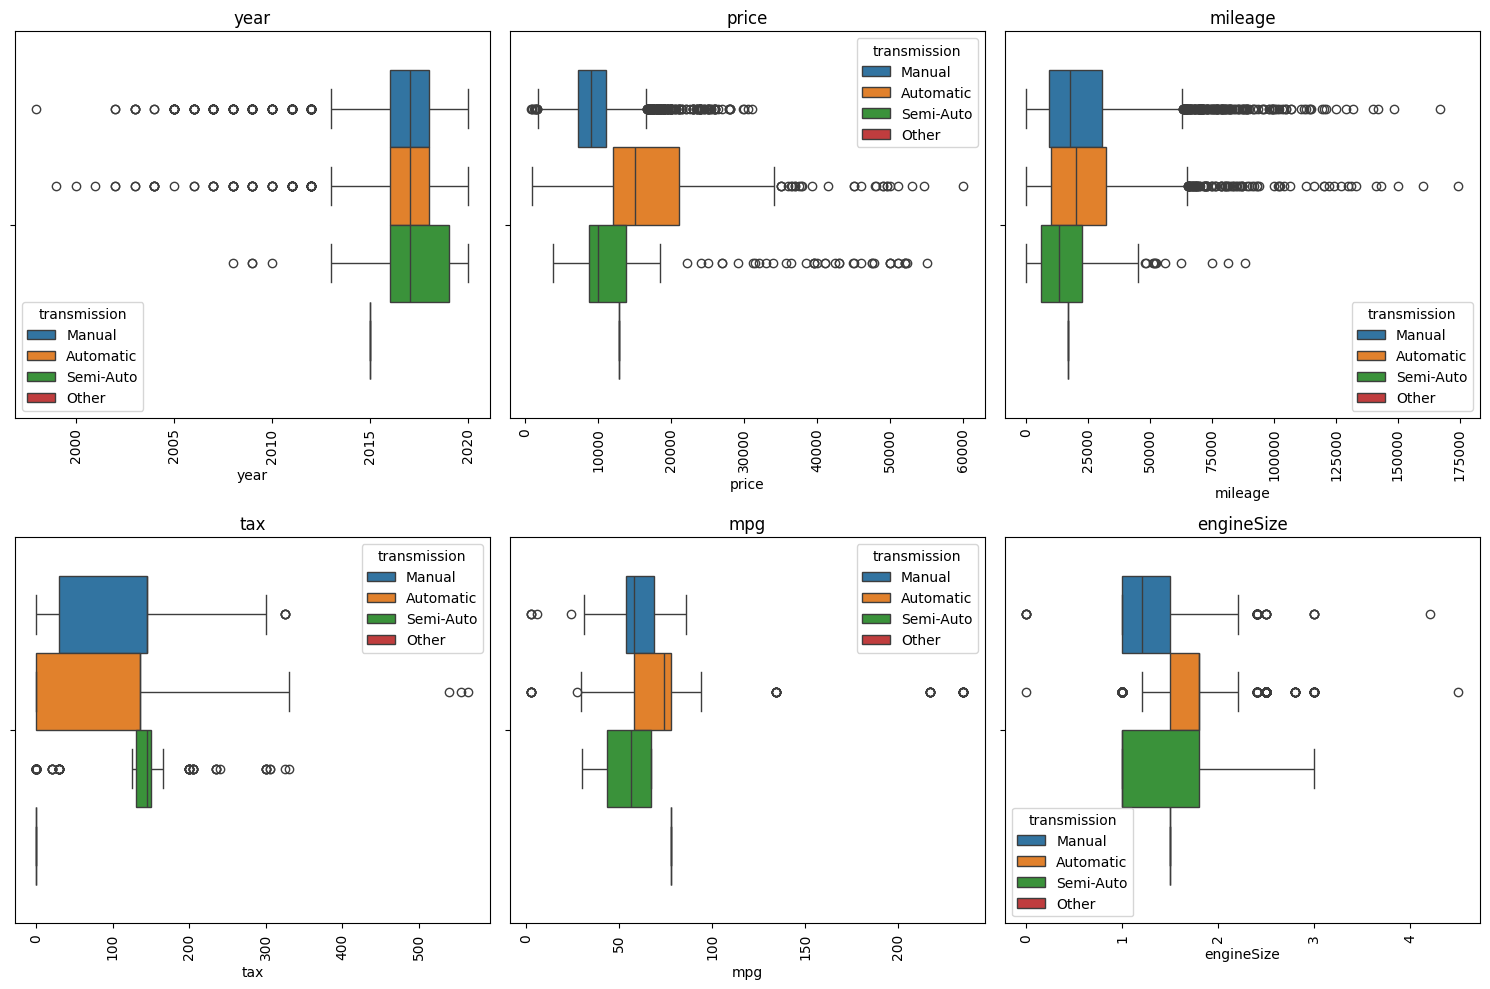

In [23]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()
max_categories=5

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.boxplot(x=var,hue='transmission',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

<ipython-input-31-735a3d89d04e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-31-735a3d89d04e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-31-735a3d89d04e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-31-735a3d89d04e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-31-735a3d89d04e>:12: UserWarning: set_ticklabels() should only be used with a

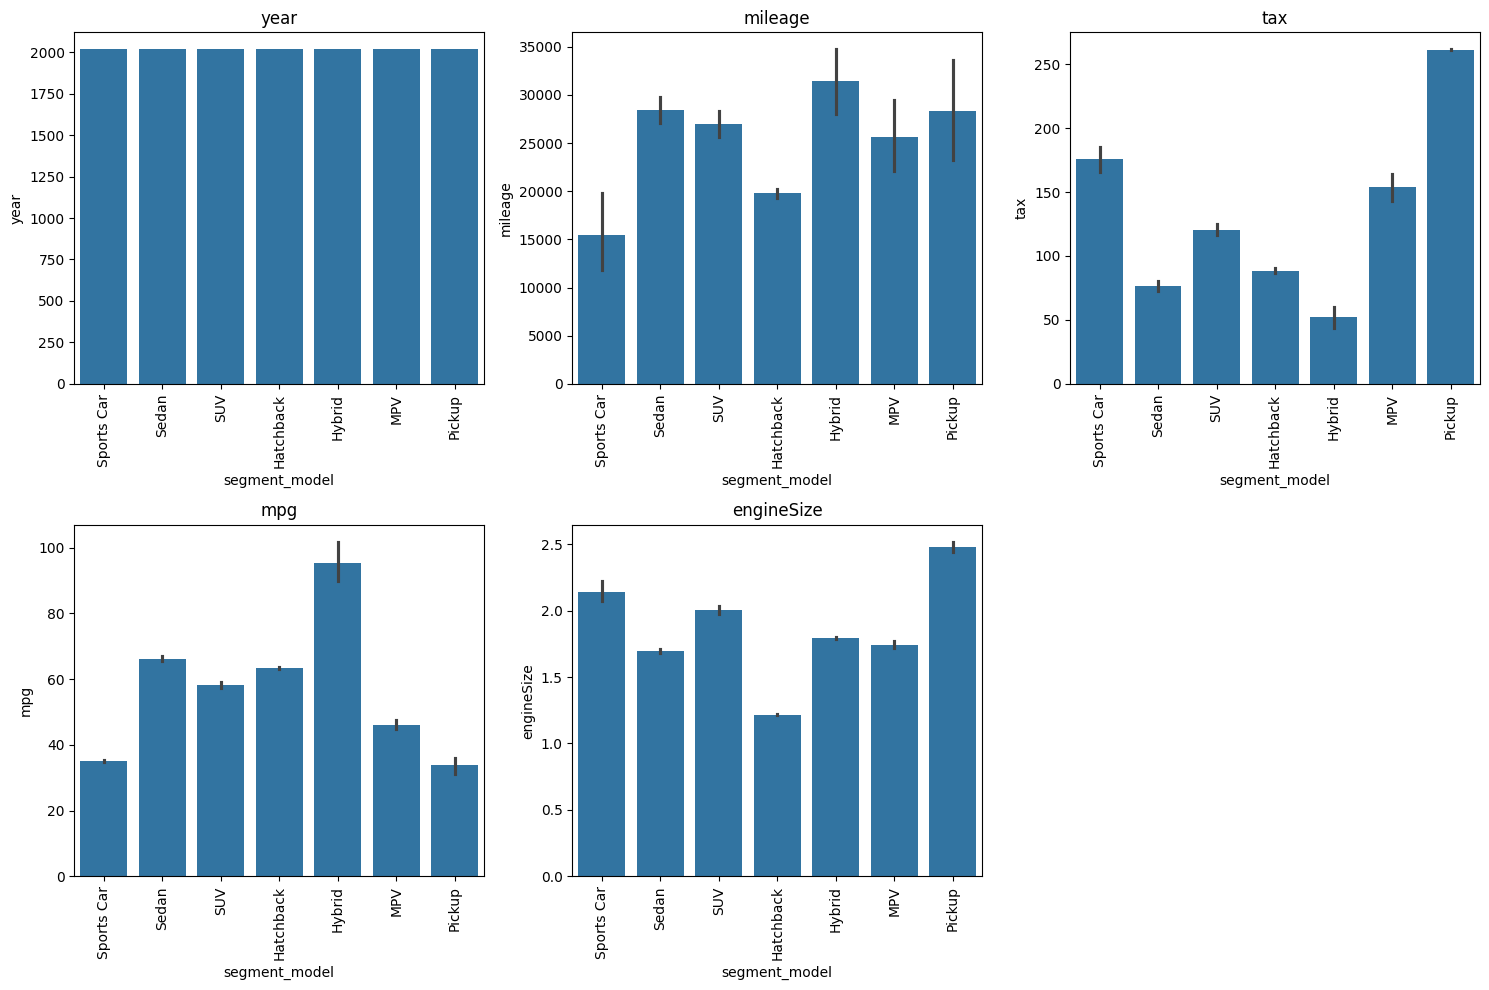

In [31]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()
num_vars.remove('price')
max_categories=5

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.barplot(y=var,x='segment_model',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

<ipython-input-34-f21610f4f008>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-34-f21610f4f008>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-34-f21610f4f008>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-34-f21610f4f008>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-34-f21610f4f008>:11: UserWarning: set_ticklabels() should only be used with a

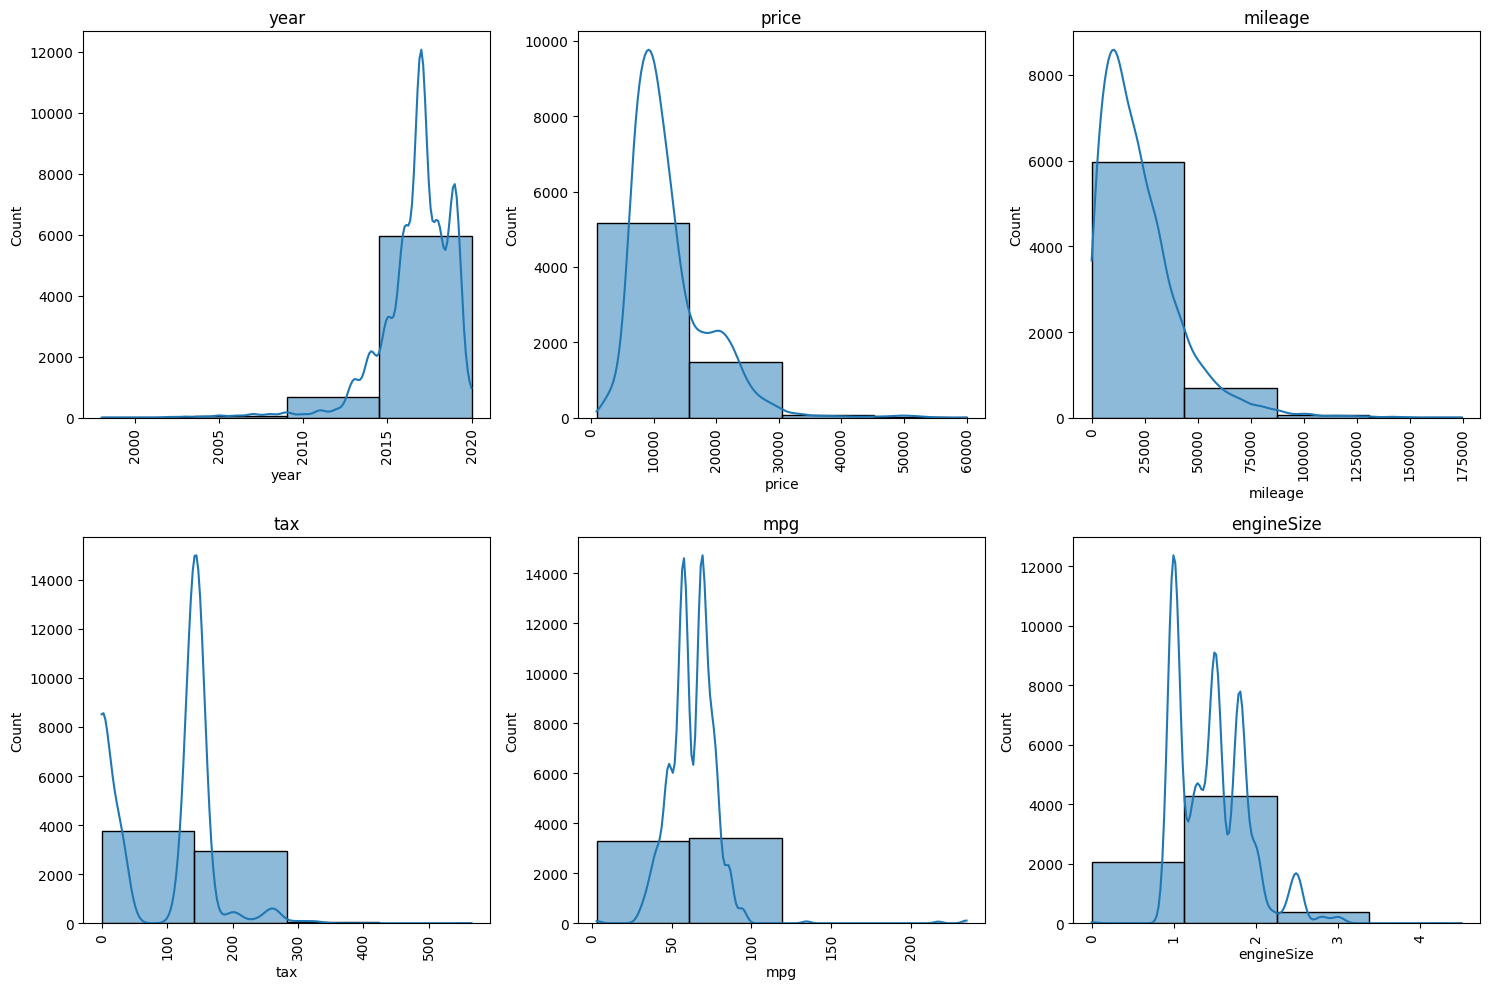

In [34]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()
max_categories=5

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.histplot(x=var,kde=True,data=df,bins=4,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

# Preprocessing Data Part 2

In [32]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0
segment_model,0


In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
for i in df.select_dtypes(include='object'):
  df[i]=encoder.fit_transform(df[i])

In [37]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,segment_model
0,6,2016,16000,1,24089,3,265,36.2,2.0,6
1,6,2017,15995,1,18615,3,145,36.2,2.0,6
2,6,2015,13998,1,27469,3,265,36.2,2.0,6
3,6,2017,18998,1,14736,3,150,36.2,2.0,6
4,6,2017,17498,1,36284,3,145,36.2,2.0,6
...,...,...,...,...,...,...,...,...,...,...
6733,8,2011,5500,0,30000,3,20,58.9,1.0,0
6734,14,2011,4985,1,36154,3,125,50.4,1.3,4
6735,14,2012,4995,1,46000,0,125,57.6,1.4,4
6736,14,2011,3995,1,60700,3,125,50.4,1.3,4


In [39]:
from scipy import stats

selected_columns=['price','tax','mileage','mpg']
zscore=np.abs(stats.zscore(df[selected_columns]))

outlier_indices=np.where(zscore >3)[0]
df=df.drop(index=outlier_indices)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,segment_model
0,6,2016,16000,1,24089,3,265,36.2,2.0,6
1,6,2017,15995,1,18615,3,145,36.2,2.0,6
2,6,2015,13998,1,27469,3,265,36.2,2.0,6
3,6,2017,18998,1,14736,3,150,36.2,2.0,6
4,6,2017,17498,1,36284,3,145,36.2,2.0,6


In [40]:
df.shape

(6502, 10)

<Axes: >

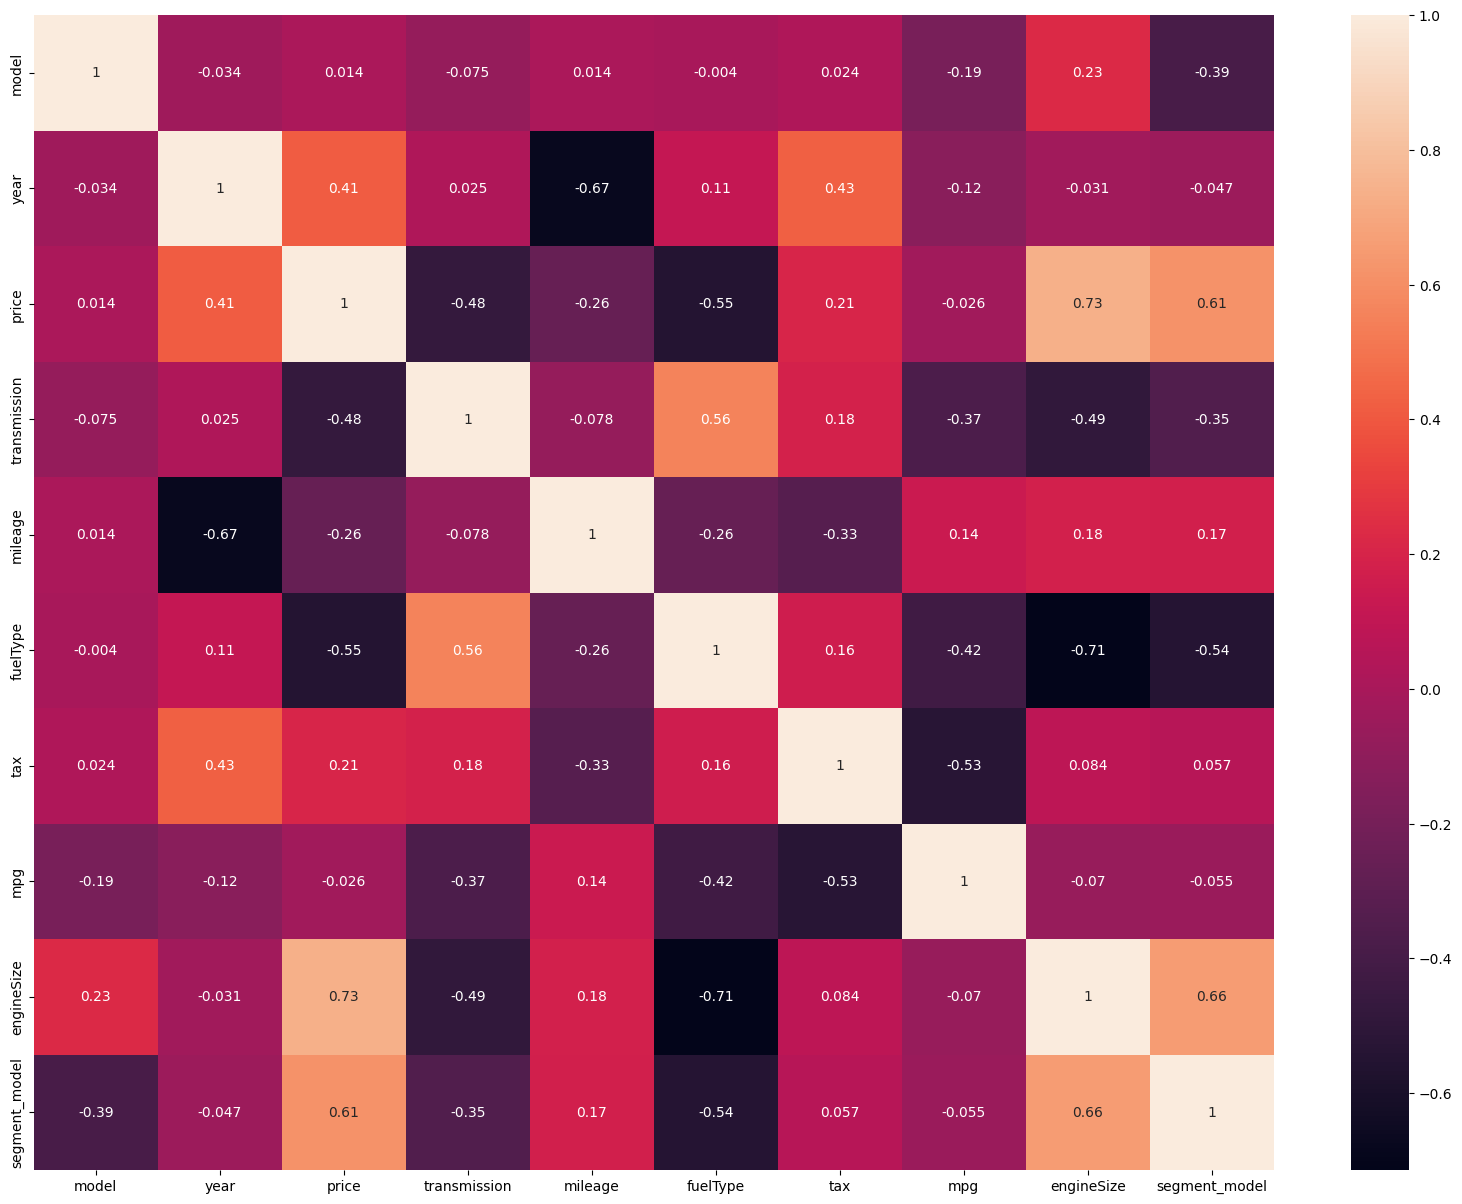

In [41]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

# Model Building

In [42]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['price','model'],axis=1)
y=df['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [45]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb=XGBRegressor()
param_grids=({
    'learning_rate':[1,0.1,0.001],
    'max_depth':[2,3,4,5],
    'n_estimators':[100,50,150,200]
})
grid=GridSearchCV(xgb,param_grids,cv=5)
grid.fit(X_train_scaled,y_train)
print(grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [48]:
xgb=XGBRegressor(learning_rate=0.1,max_depth=4,n_estimators=200)
xgb.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred=xgb.predict(X_test_scaled)
mse=mean_absolute_error(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('r2:',r2)

MSE: 712.9710384665042
MAE: 999282.8262034222
r2: 0.9675549864768982


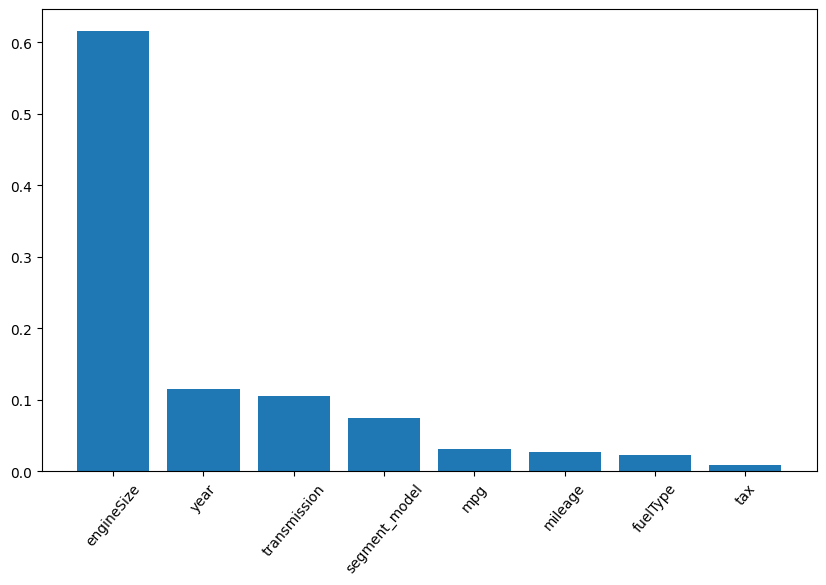

In [54]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':xgb.feature_importances_
})
imp=imp_df.nlargest(10,'Importance')
plt.figure(figsize=(10,6))
plt.bar(imp['Kolom'],imp['Importance'])
plt.xticks(rotation=50)
plt.show()

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred=rf.predict(X_test_scaled)
mse=mean_absolute_error(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('r2:',r2)

MSE: 774.1247376000035
MAE: 1181115.7904185702
r2: 0.9616511865543632


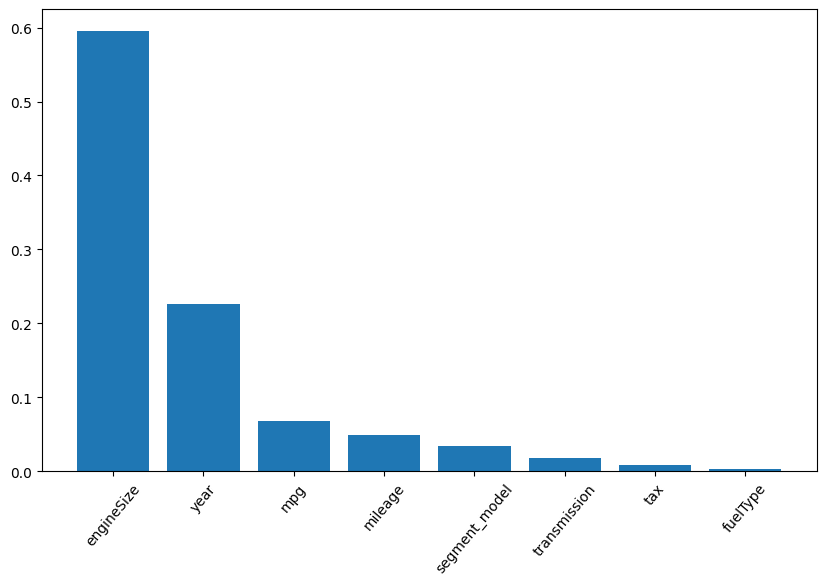

In [58]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':rf.feature_importances_
})
imp1=imp_df.sort_values(by='Importance',ascending=False)
imp2=imp1.head(10)
plt.figure(figsize=(10,6))
plt.bar(imp2['Kolom'],imp2['Importance'])
plt.xticks(rotation=50)
plt.show()

In [60]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,segment_model
6733,8,2011,5500,0,30000,3,20,58.9,1.0,0
6734,14,2011,4985,1,36154,3,125,50.4,1.3,4
6735,14,2012,4995,1,46000,0,125,57.6,1.4,4
6736,14,2011,3995,1,60700,3,125,50.4,1.3,4
6737,14,2011,4495,1,45128,3,125,50.4,1.3,4


In [69]:
# input_user = [[8, 2013, 4985, 50700, 2, 125, 58.4, 1.4]]
input_user = [[2011, 1, 36154, 3, 125, 50.4, 1.3, 4]]
input_scaled=scaler.transform(input_user)
prediction=xgb.predict(input_scaled)
print('Predicted Price:$',prediction[0])

Predicted Price:$ 6379.3076


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
